# Image classification

1. Download [cats-and-dogs-mini-dataset](https://www.kaggle.com/datasets/aleemaparakatta/cats-and-dogs-mini-dataset) from Kaggle website in a zip format.
2. Upload zip file to colab file storage.

In [ ]:
!mkdir dataset
!mv archive.zip dataset

In [ ]:
!cd dataset && unzip archive.zip

Task: Open one of the cat/dog image and display it

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

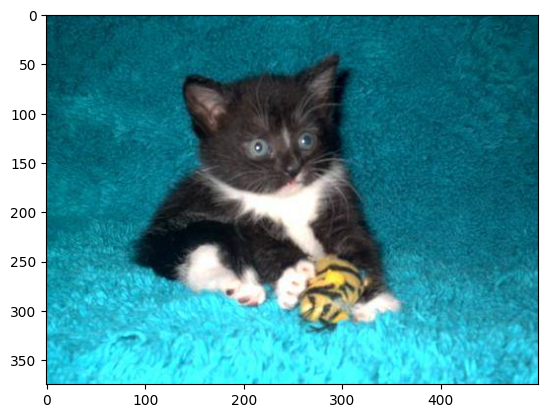

In [ ]:
file_path = '/content/dataset/cats/cat.4020.jpg'
image = Image.open(file_path)
plt.imshow(image)

In [ ]:
import numpy as np
image_array = np.array(image)
print(image_array.shape)

(375, 499, 3)


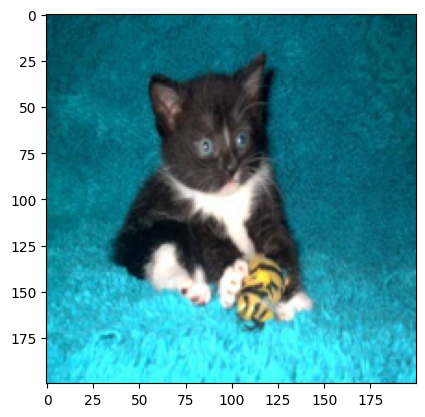

In [ ]:
image = image.resize((200, 200))
plt.imshow(image)

In [ ]:
flattened_image = np.array(image).flatten()
print(flattened_image.shape)

(120000,)


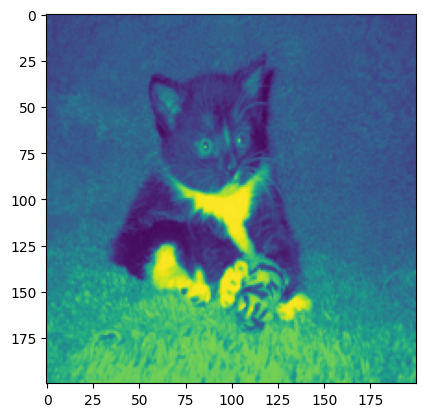

In [ ]:
image = image.resize((200, 200)).convert('L')
plt.imshow(image)

In [ ]:
flattened_image = np.array(image).flatten()
print(flattened_image.shape)

(40000,)


Different images appear to have different shapes.

## Task# 1: Load all images and their labels

In [ ]:
def load_images(data_dir, target_size=(200, 200)):
  images = []
  labels = []

  class_names = os.listdir(data_dir)
  for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
      image_path = os.path.join(class_dir, image_name)
      try:
        image = Image.open(image_path).resize(target_size).convert('L')
        image_array = np.array(image).flatten()/255.0
        # print (image_array.shape)

        # add images to image list along with class label in label list.
        images.append(image_array)
        labels.append(class_name)
      except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        continue

  return np.array(images), np.array(labels)

In [ ]:
images, labels = load_images('/content/dataset')

In [ ]:
images.shape

(1000, 40000)

In [ ]:
labels.shape

(1000,)

## Split data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [ ]:
print ("Training data:", train_images.shape, train_labels.shape)
print ("Test data:", test_images.shape, test_labels.shape)

Training data: (800, 40000) (800,)
Test data: (200, 40000) (200,)


In [ ]:
train_labels[:5]

array(['dogs', 'cats', 'cats', 'cats', 'cats'], dtype='<U4')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

In [ ]:
train_labels[:5]

array([1, 0, 0, 0, 0])

## Training data augmentation

In [ ]:
import random

def augment_data(images, labels, augmentation_factor=2):
  augmented_images = []
  augmented_labels = []

  for image, label in zip(images, labels):
    augmented_images.append(image)
    augmented_labels.append(label)

    for _ in range(augmentation_factor):
      # decide angel of rotation
      angle = random.uniform(-30, 30)
      img = Image.fromarray((image.reshape((200, 200))*255).astype(np.uint8))

      # rotate the image
      img = img.rotate(angle)
      rotated_image = np.array(img).flatten()/255.0

      # add rotated image
      augmented_images.append(rotated_image)
      augmented_labels.append(label)

  return np.array(augmented_images), np.array(augmented_labels)

In [ ]:
x_train_augmented, y_train_augmented = augment_data(train_images, train_labels)

In [ ]:
print ("Training data:", x_train_augmented.shape, y_train_augmented.shape)

Training data: (2400, 40000) (2400,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
pipeline.fit(x_train_augmented, y_train_augmented)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

In [ ]:
predicted_labels = pipeline.predict(test_images)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

        cats       0.64      0.71      0.68       104
        dogs       0.65      0.57      0.61        96

    accuracy                           0.65       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.65      0.65      0.64       200



## Error analysis

In [ ]:
errors = np.where(predicted_labels != test_labels)[0]
errors

array([  0,   2,   5,  13,  20,  24,  28,  30,  32,  35,  42,  43,  44,
        47,  48,  49,  51,  53,  55,  57,  58,  61,  66,  67,  71,  74,
        75,  76,  79,  82,  90,  92,  93,  95, 103, 104, 108, 115, 120,
       121, 122, 123, 125, 127, 132, 135, 136, 137, 138, 142, 153, 162,
       163, 164, 166, 170, 174, 176, 179, 182, 183, 184, 186, 189, 190,
       193, 194, 195, 196, 198, 199])

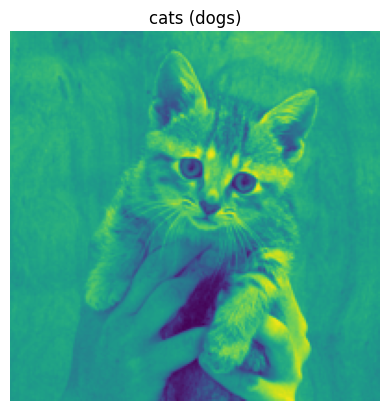

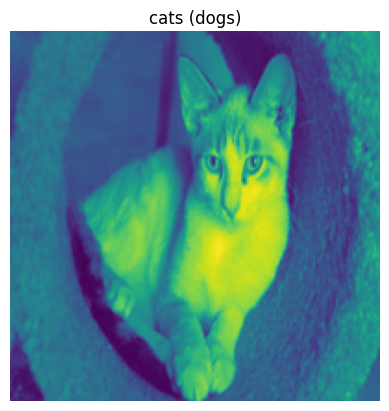

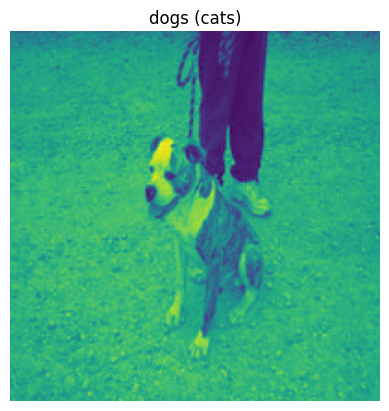

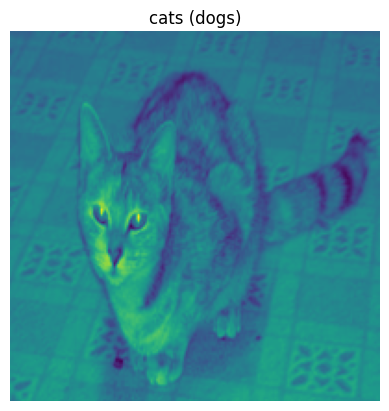

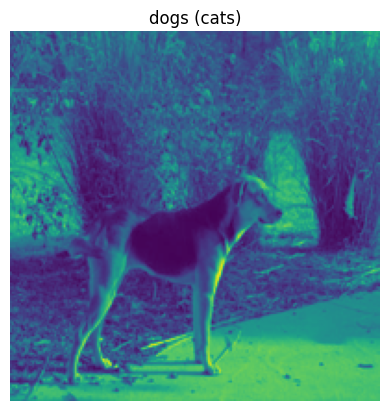

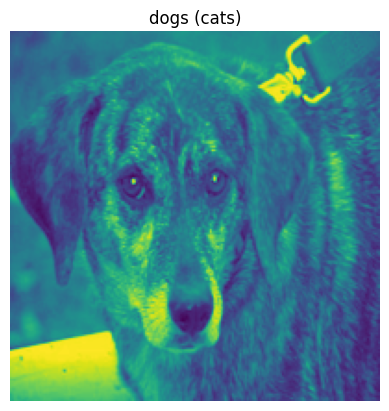

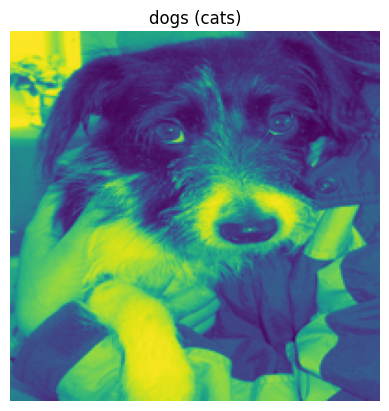

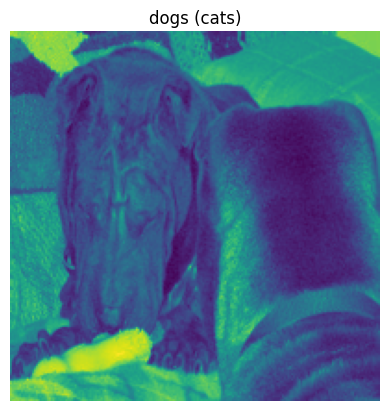

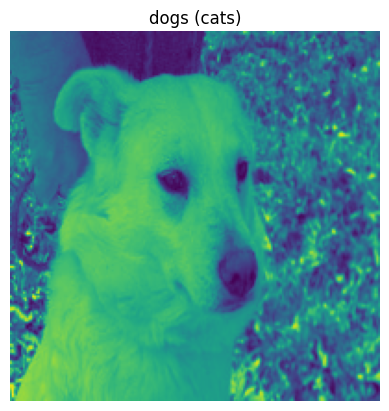

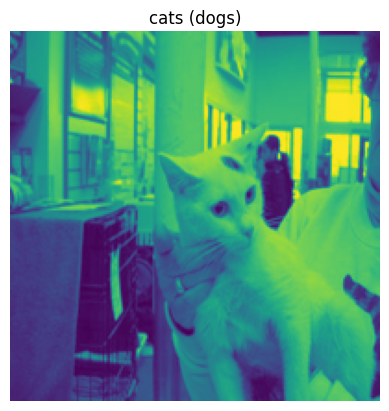

In [ ]:

for error_index in errors[:10]:
  error_image = test_images[errors[error_index]]
  actual_label = test_labels[errors[error_index]]
  predicted_label = predicted_labels[errors[error_index]]

  plt.imshow(error_image.reshape((200, 200)))
  plt.title(f"{actual_label} ({predicted_label})")
  plt.axis('off')
  plt.show()
